In [49]:
%%writefile /mnt/solexa/mel_yang/early_CN/firstdraft/mymap.R

library(fields)
#library(RColorBrewer)

padding = 6

data=read.table("/mnt/solexa/mel_yang/early_CN/firstdraft/latlong_anc.txt",header=T)

NAMES <- as.character(data[,1])
Latitude<-as.numeric(data[,2])
Longitude<-as.numeric(data[,3])
group<-as.character(data[,4])
colors=as.character(data[,5])

minLong = 80
maxLong = 160
minLat = 5
maxLat = 70

png("/mnt/solexa/mel_yang/early_CN/firstdraft/ancmap.png",width=1440*300/72,height=(maxLat-minLat)*1440*300/(maxLong-minLong)/72,res=300)
cols <- "black"
plot(Longitude,Latitude,type="n",main="Location of Samples",xlim=c(minLong,maxLong),ylim=c(minLat,maxLat), cex.lab=2,cex.axis=2)
for (i in NAMES) {
    text(Longitude,Latitude,labels=NAMES,cex=2,adj=0)
}
library(mapdata)
library(maps)
library(maptools)


map(database='worldHires', fill=TRUE,xlim=c(minLong,maxLong),ylim=c(minLat,maxLat),col='lightgray',boundary=FALSE)

CASPIAN <- read.table('/home/mel_yang/rcode/Caspian.txt')
polygon(CASPIAN[,2:1],col='white',border='white')

PCH <- vector(length=length(Longitude))
PCH[1:length(PCH)] <-rev(1:length(PCH))
points(Longitude,Latitude,pch=PCH,col=colors,cex=4,lty=8)
#abline(h = mainlat, lty = 2)
#abline(v = mainlon, lty = 2)

legend("bottomright",NAMES,pch=PCH,col=colors,cex=1.5,ncol=3)

box()

dev.off()


Overwriting /mnt/solexa/mel_yang/early_CN/firstdraft/mymap.R


In [50]:
%%bash
Rscript /mnt/solexa/mel_yang/early_CN/firstdraft/mymap.R

null device 
          1 


Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-0 (2018-06-19) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


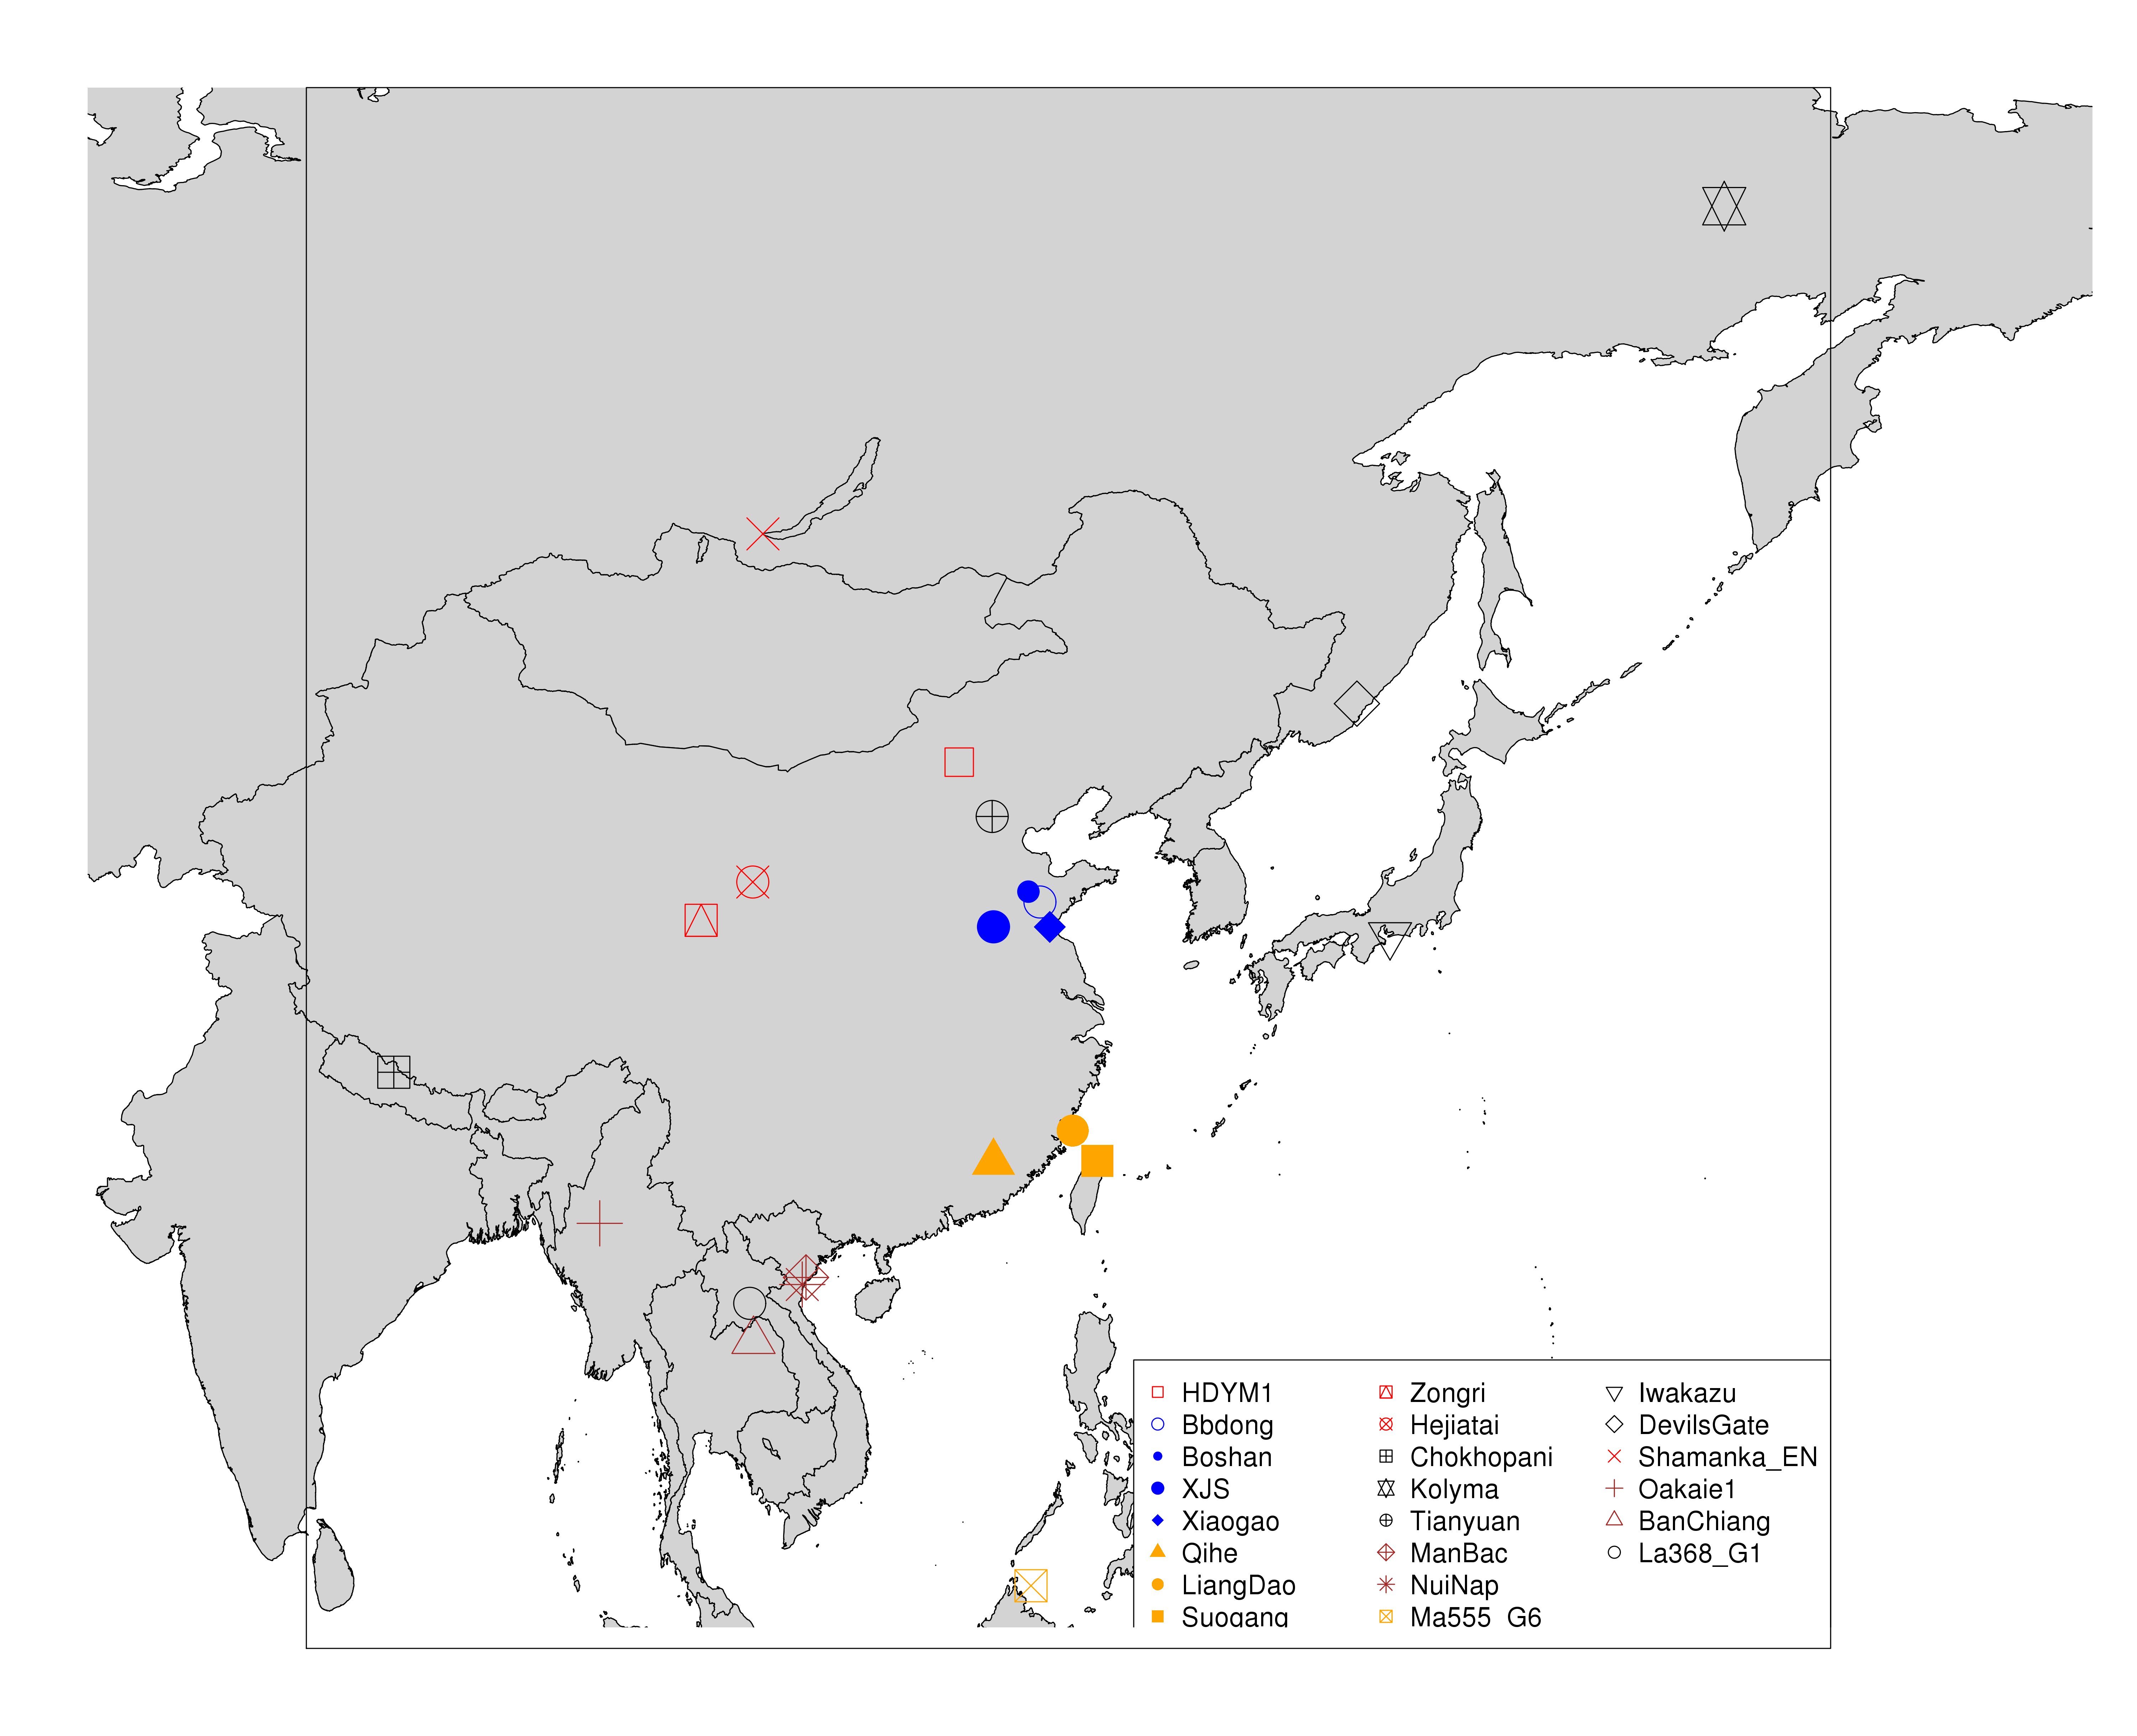

In [51]:
from IPython.display import Image
pD="/mnt/solexa/mel_yang/early_CN/firstdraft/"
outname="ancmap"
Image(filename=pD+outname+'.png') 